In [1]:
"""
Created on Mon Jan 18 13:57:50 2021

@author: Mateo
"""

from HARK.datasets.SCF.WealthIncomeDist.SCFDistTools import income_wealth_dists_from_scf
import seaborn as sns
from itertools import product, starmap
import pandas as pd

# List the education levels and years
educ_lvls = ["NoHS", "HS", "College"]
years = list(range(1995, 2022, 3))

age = 25
base_year = 1992

In [2]:
params = list(product([base_year], [age], educ_lvls, years))
base_year, age, education, year = list(zip(*params))

frame = pd.DataFrame(
    {"base_year": base_year, "age": age, "education": education, "wave": year}
)

results = list(starmap(income_wealth_dists_from_scf, params))
frame = pd.concat([frame, pd.DataFrame(results)], axis=1)

I:\Mambaforge\envs\HARK\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


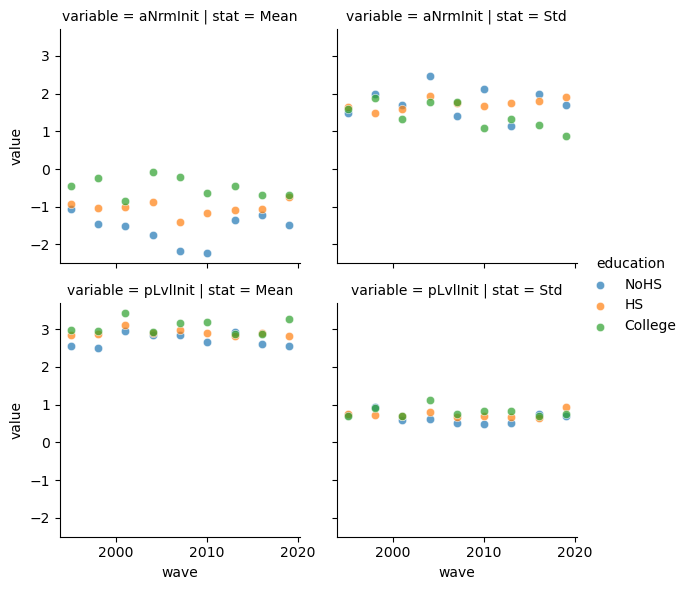

In [3]:

# Formatting
frame = frame.melt(id_vars=["base_year", "age", "education", "wave"])
aux = frame["variable"].str.split("(Mean|Std)", n=1, expand=True)
frame["variable"] = aux[0]
frame["stat"] = aux[1]

# Plot
g = sns.FacetGrid(frame, col="stat", row="variable", hue="education", sharey=True)
g.map(sns.scatterplot, "wave", "value", alpha=0.7)
g.add_legend()